In [1]:
## processing
import numpy as np
import pandas as pd

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Classifying sequences using flDPnn

In [2]:
df_fldpnn = pd.read_table('~/drummondlab/fldpnn-scer-summary.txt', comment='#')
df_fldpnn.head(10)

,ORF,Residue Number,Residue Type,Predicted Score for Disorder,Binary Prediction for Disorder,rdp_r,rdp_d,rdp_p,dfl,fmorf
0,Q0045,1,M,0.059,0,0.062,0.052,0.269,0.077,0.4990
1,Q0045,2,V,0.055,0,0.062,0.086,0.292,0.095,0.4990
2,Q0045,3,Q,0.028,0,0.040,0.085,0.323,0.095,0.4990
3,Q0045,4,R,0.024,0,0.036,0.086,0.302,0.080,0.4990
4,Q0045,5,W,0.020,0,0.036,0.091,0.287,0.083,0.4132
5,Q0045,6,L,0.017,0,0.031,0.095,0.280,0.069,0.4312
6,Q0045,7,Y,0.019,0,0.029,0.097,0.290,0.070,0.4655
7,Q0045,8,S,0.019,0,0.028,0.088,0.324,0.073,0.3772
8,Q0045,9,T,0.019,0,0.029,0.073,0.334,0.067,0.3242
9,Q0045,10,N,0.021,0,0.035,0.080,0.338,0.073,0.3707


In [3]:
def append_fldpnn_label(row):
    orf = row['orf']
    left_bound = row['left_bound']
    right_bound = row['right_bound']
    region = row['region_seq']
    
    if orf in df_fldpnn['ORF'].unique():
        fldpnn_pred = df_fldpnn[df_fldpnn.ORF == orf]
        fldpnn_region = ''.join(fldpnn_pred['Residue Type'].to_list()[left_bound:(right_bound+1)])
        if not fldpnn_region == region:
            print(fldpnn_region)
            print(region)
        #assert fldpnn_region == region
        total_score = np.mean(fldpnn_pred['Predicted Score for Disorder'].to_list()[left_bound:(right_bound+1)])
        if total_score >= 0.3:
            return 'disordered'
        else:
            return 'helix'
    else:
        return None

In [4]:
with open('../../data/misc/uniprot-to-sgdid.txt') as f:
    mappings = {}
    for line in f:
        uniprot = line[95:106].rstrip()
        orf = line[75:95].rstrip()
        mappings[uniprot] = orf

In [5]:
def append_orf(row):
    return mappings[row['uni_id']]

In [4]:
fldpnn_hc = pd.read_csv('../../data/charged_regions/cr_trimmed_filtered_aflabel.csv')
fldpnn_hc.rename(columns={'left.bound': 'left_bound', 'right.bound': 'right_bound', 'region.seq': 'region_seq'}, inplace=True)
fldpnn_hc['fldpnn_label'] = fldpnn_hc.apply(lambda row: append_fldpnn_label(row), axis=1)
fldpnn_hc.head(5)

,orf,gene,seq.len,left_bound,right_bound,region_seq,region.len,charge.asymmetry,frac.charge,uni_id,orf_label,kappa,label,fldpnn_label
0,YAL011W,SWC3,626,5,53,RTRSKESSIEQKPASRTRTRSRRGKRGRDDDDDDDDEESDDAYDEVGND,49,0.017593,0.591837,P31376,verified,0.539053,disordered,disordered
1,YAL011W,SWC3,626,169,261,RLFILKNDKIEQKWQDEQELKKKEKELKRKNDAEAKRLRMEERKRQ...,93,0.052936,0.559140,P31376,verified,0.098538,helix,helix
2,YAL011W,SWC3,626,361,424,KTAATEPEPKKADDENAEKQQSKEAKTTAESTQVDVKKEEEDVKEK...,64,0.007812,0.500000,P31376,verified,0.089231,disordered,disordered
3,YAL013W,DEP1,406,84,159,ESLKRPHEDEKEAIDEAKKMKVPGENEDESKEEEKSQELEEAIDSK...,76,0.138444,0.592105,P31385,verified,0.219047,disordered,disordered
4,YAL019W,FUN30,1132,463,538,ERETKRIRNTTKPKVVEDEDDDVDLEAIDDELPQSEHEDDDYEEED...,76,0.269474,0.644737,P31380,verified,0.498598,disordered,disordered


In [8]:
fldpnn_hc.to_csv('../../data/charged_regions/cr_trimmed_filtered_aflabel_fldpnnlabel.csv')

In [7]:
fldpnn_random = pd.read_csv('../../data/af_regions/random_af_regions_low_thresh.csv')
fldpnn_random['orf'] = fldpnn_random.apply(lambda row: append_orf(row), axis=1)
fldpnn_random.rename(columns={'seq': 'region_seq'}, inplace=True)
fldpnn_random['fldpnn_label'] = fldpnn_random.apply(lambda row: append_fldpnn_label(row), axis=1)
fldpnn_random.head(5)

IGIAIVFAALINGVSRNPSIKDLVFPMAILGFALSEATGLFCLM
IGIAIVFAALINGVSRNPSIKDTVFPMAILGFALSEATGLFCLM
DIVSLVVQAVGGGLCGVAVTDGTSTTTGNHVFIAGLAIQVASMA
LAKLIEVYGHRFSLLPSPMAYSFIFICSDIVSLVVQAVGGGLCG
FNLAITVAVLTIFTRCCYRLAELVVGWDGYLITHEWYFIILDALMMA
ISQTEVDYLYREKFHFLRLEPKRWVFHYFNLAITVAVLTIFTRCCYR


,uni_id,region_seq,left_bound,right_bound,label,orf,fldpnn_label
0,Q04007,FYAPSILSRSGSSTDVLSSGIDSMAKNSKETRGRFRSLSLMDPALQ...,503,552,disordered,YDR186C,helix
1,P22516,PIAEVVTLPYQYLLSESTRSSLQINLENSIVIIDEAHNLIETINSI...,359,452,helix,YPL008W,helix
2,Q12218,APSSSEVVSSSVASSSSEVASSSVAPSSSEVVSSSVASSSSEVASS...,164,228,disordered,YOR009W,disordered
3,P38196,TIPTEDYEEITKESEMGDATKITSKIDANVIEKKDTDSENNITIAQ...,18,94,disordered,YBL042C,None
4,Q12186,IQGIVCKICGQTGHFSRDCNSSSQRMSRFDRNATVNNSAPIQSNDV...,293,369,disordered,YLR116W,helix


In [9]:
fldpnn_random.to_csv('../../data/af_regions/random_af_regions_low_thresh_fldpnnlabel.csv')

In [6]:
fldpnn_all = pd.read_csv('../../data/af_regions/sc_af_regions_all.csv')
fldpnn_all['orf'] = fldpnn_all.apply(lambda row: append_orf(row), axis=1)
fldpnn_all.rename(columns={'start': 'left_bound', 'end':'right_bound'}, inplace=True)
fldpnn_all['fldpnn_label'] = fldpnn_all.apply(lambda row: append_fldpnn_label(row), axis=1)
fldpnn_all.head(5)

In [13]:
fldpnn_all.to_csv('../../data/af_regions/sc_af_regions_all_fldpnn.csv')

### Building confusion matrices

Loading the original confusion matrix

In [54]:
cnf_df = pd.read_csv('../../misc/cp_cnf_matrices_posttrim.csv')

In [55]:
fldpnn_all = pd.read_csv('../../data/af_regions/sc_af_regions_all_fldpnn.csv')
fldpnn_rd = pd.read_csv('../../data/af_regions/random_af_regions_low_thresh_fldpnnlabel.csv')
fldpnn_hc = pd.read_csv('../../data/charged_regions/cr_trimmed_filtered_aflabel_fldpnnlabel.csv')
df_fldpnn = [fldpnn_all, fldpnn_rd, fldpnn_hc]

In [56]:
cnf_fldpnn_all = np.array([[0, 0], [0, 0]])
cnf_fldpnn_rd = np.array([[0, 0], [0, 0]])
cnf_fldpnn_hc = np.array([[0, 0], [0, 0]])
cnf_fldpnn = [cnf_fldpnn_all, cnf_fldpnn_rd, cnf_fldpnn_hc]

In [57]:
for i in range(3):
    df = df_fldpnn[i]
    cnf = cnf_fldpnn[i]
    cnf[0, 0] = len(df[(df.label == 'disordered') & (df.fldpnn_label == 'disordered')])
    cnf[0, 1] = len(df[(df.label == 'disordered') & (df.fldpnn_label == 'helix')])
    cnf[1, 0] = len(df[(df.label == 'helix') & (df.fldpnn_label == 'disordered')])
    cnf[1, 1] = len(df[(df.label == 'helix') & (df.fldpnn_label == 'helix')])

In [58]:
sample_size = []
for df in df_uv:
    sample_size.append(len(df))

In [59]:
cnf_df_new = pd.DataFrame(columns={'TN', 'FP', 'FN', 'TP', 'n'})
i = 0
for mat in cnf_fldpnn:
    rv = {}
    rv['TN'] = mat[0][0]
    rv['FP'] = mat[0][1]
    rv['FN'] = mat[1][0]
    rv['TP'] = mat[1][1]
    rv['n'] = sample_size[i]
    cnf_df_new = cnf_df_new.append(rv, ignore_index=True)
    i += 1
    if i == 3:
        i = 0

/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/2370057698.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnf_df_new = cnf_df_new.append(rv, ignore_index=True)
/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/2370057698.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnf_df_new = cnf_df_new.append(rv, ignore_index=True)
/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/2370057698.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cnf_df_new = cnf_df_new.append(rv, ignore_index=True)


In [65]:
cnf_df_final = pd.concat([cnf_df, cnf_df_new])

In [66]:
cnf_matrices = []
sample_size = []
for index, row in cnf_df_final.iterrows():
    mat = np.array([[row['TN'], row['FP']], [row['FN'], row['TP']]])
    cnf_matrices.append(mat)
    if index < 3:
        sample_size.append(row['n'])

In [68]:
def get_cnf_freq(cnf_mat):
    cnf_freq = cnf_mat / cnf_mat.sum(axis=1)[:, np.newaxis]
    return cnf_freq

In [69]:
titles = ['Purely helical\nand disordered\nregions',
          'Randomly\ndrawn\nregions',
          'Highly\ncharged\nregions']

/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/2948773154.py:2: RuntimeWarning: invalid value encountered in true_divide
  cnf_freq = cnf_mat / cnf_mat.sum(axis=1)[:, np.newaxis]


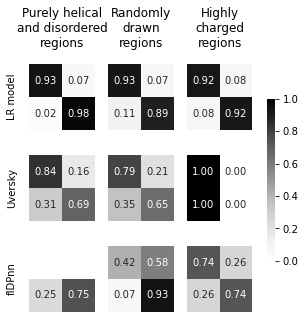

In [81]:
fig, axes = plt.subplots(3, 3, figsize=(4, 5), constrained_layout=False)
cbar_ax = fig.add_axes([0.95, .3, .03, .45])

for i, ax in enumerate(axes.flat):
    g = sns.heatmap(pd.DataFrame(get_cnf_freq(cnf_matrices[i])), ax=ax,
                    annot=True, fmt=".2f",
                    xticklabels=['', ''], yticklabels=['', ''],
                    cmap="Greys", cbar= (i == 0),
                    vmin=0, vmax=1,
                    cbar_ax=None if i else cbar_ax)
    g.tick_params(left=False, bottom=False)
    if i < 3:
        g.set_title(titles[i], fontsize=12, pad=5)
    #ax.title.set_position([.5, 0.8])
    if i == 0:
        ax.set_ylabel('LR model')
        ax.yaxis.labelpad = 5
    elif i == 3:
        ax.set_ylabel('Uversky')
        ax.yaxis.labelpad = 5
    elif i == 6:
        ax.set_ylabel('flDPnn')
        ax.yaxis.labelpad = 5
    bottom, top = ax.get_ylim()
    ax.set_aspect('equal', adjustable="datalim")
    #ax.set_ylim(bottom + 0.5, top - 0.5)

#plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.01)
#plt.savefig('./plots/Figure4D.png', dpi=300, bbox_inches='tight')

### Overall accuracy score

In [71]:
l_acc = []
for i in range(9):
    cnf = cnf_matrices[i]
    accuracy = (cnf[0, 0] + cnf[1, 1]) / np.sum(cnf)
    l_acc.append(accuracy)
sc_acc = np.mean(l_acc[:3])

In [72]:
l_acc

[0.9544642857142858,
 0.9104258443465492,
 0.920704845814978,
 0.7642857142857142,
 0.7195301027900147,
 0.5212922173274597,
 0.7523900573613767,
 0.6647546207775653,
 0.7364975450081833]

In [73]:
ticks = ['LR model,\nall regions',
         'LR model,\nrandomly drawn regions',
         'LR model,\nhighly charged regions',
         'Uversky plot,\nall regions',
         'Uversky plot,\nrandomly drawn regions',
         'Uversky plot,\nhighly charged regions',
         'flDPnn,\nall regions',
         'flDPnn,\nrandomly drawn regions',
         'flDPnn,\nhighly charged regions']

In [74]:
df_cnf = pd.DataFrame(columns=['model', 'dataset', 'l_acc'])

In [75]:
datasets = ['All regions', 'Random', 'Highly\ncharged']

In [76]:
for i in range(3):
    df_cnf = df_cnf.append({'model': 'LR', 'dataset':datasets[i], 'l_acc': l_acc[i]},
                           ignore_index=True)

/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/949739124.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cnf = df_cnf.append({'model': 'LR', 'dataset':datasets[i], 'l_acc': l_acc[i]},
/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/949739124.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cnf = df_cnf.append({'model': 'LR', 'dataset':datasets[i], 'l_acc': l_acc[i]},
/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/949739124.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cnf = df_cnf.append({'model': 'LR', 'dataset':datasets[i], 'l_acc': l_acc[i]},


In [77]:
for i in range(3):
    df_cnf = df_cnf.append({'model': 'Uversky', 'dataset':datasets[i], 'l_acc': l_acc[i+3]},
                           ignore_index=True)

/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/2541002017.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cnf = df_cnf.append({'model': 'Uversky', 'dataset':datasets[i], 'l_acc': l_acc[i+3]},
/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/2541002017.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cnf = df_cnf.append({'model': 'Uversky', 'dataset':datasets[i], 'l_acc': l_acc[i+3]},
/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/2541002017.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cnf = df_cnf.append({'model': 'Uversky', 'dataset':datasets[i], 'l_acc': l_acc[i+3]},


In [78]:
for i in range(3):
    df_cnf = df_cnf.append({'model': 'flDPnn', 'dataset':datasets[i], 'l_acc': l_acc[i+6]},
                           ignore_index=True)

/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/3041629165.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cnf = df_cnf.append({'model': 'flDPnn', 'dataset':datasets[i], 'l_acc': l_acc[i+6]},
/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/3041629165.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cnf = df_cnf.append({'model': 'flDPnn', 'dataset':datasets[i], 'l_acc': l_acc[i+6]},
/var/folders/dq/785ln7hn5m1_bmycnj08bnmh0000gn/T/ipykernel_91734/3041629165.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cnf = df_cnf.append({'model': 'flDPnn', 'dataset':datasets[i], 'l_acc': l_acc[i+6]},


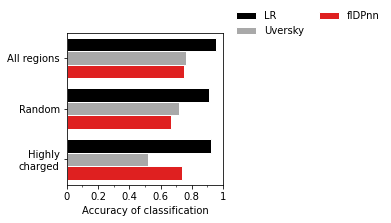

In [80]:
fig, ax = plt.subplots(figsize=(2.8,2.8))

sns.barplot(data=df_cnf, y='dataset', x='l_acc', hue='model',
            palette=['black', 'darkgrey', 'red'], edgecolor='white')
ax.set_xlabel('Accuracy of classification')
ax.set_ylabel('')
ax.set_xlim(0, 1)
ax.set_xticks(np.arange(0, 1.05, 0.2))
ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
ax.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9], minor=True)
plt.legend(title=None, ncol = 2, frameon=False, columnspacing=1.5,
           bbox_to_anchor=(1.025, 1.2))
#plt.savefig('./plots/Figure4E.png', dpi=300, bbox_inches='tight')
plt.show()